In [1]:
dat = read.table(file="cookies.dat", header=TRUE)
head(dat)

chips,location
12,1
12,1
6,1
13,1
12,1
12,1


In [2]:
table(dat$location)


 1  2  3  4  5 
30 30 30 30 30 

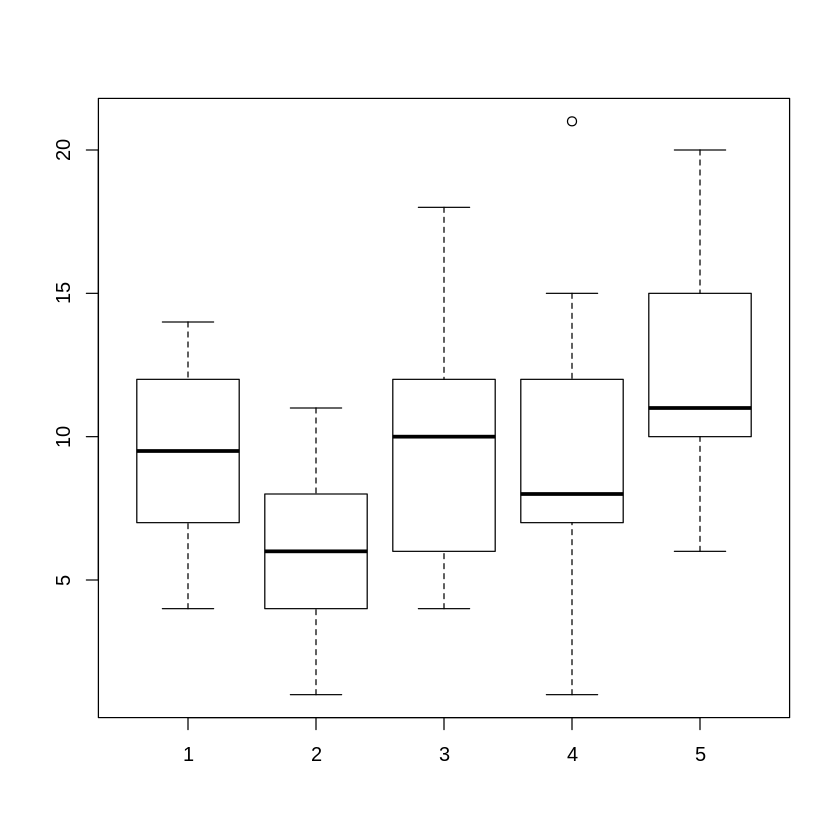

In [5]:
boxplot(chips ~ location, data = dat)

In [9]:
set.seed(112)
n_sim = 500
alpha_pri = rexp(n_sim, 1/2)
beta_pri = rexp(n_sim, 5.0)

mu_pri = alpha_pri / beta_pri
sig_pri = sqrt(alpha_pri / beta_pri^2)

summary(mu_pri)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.021    2.983    9.852   61.130   29.980 4859.000 

In [10]:
summary(sig_pri)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.1834    3.3660    8.5490   41.8100   22.2200 2866.0000 

In [12]:
?rgamma

In [11]:
lam_pri = rgamma(n_sim, shape = alpha_pri, rate = beta_pri)
